In [1]:
import pandas as pd
import numpy
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
od.download('https://www.kaggle.com/datasets/cdc/chronic-disease')

Skipping, found downloaded files in ".\chronic-disease" (use force=True to force download)


In [3]:
file_path = r'C:\Users\rajp\Desktop\kaggle\chronic-disease\U.S._Chronic_Disease_Indicators.csv'
df = pd.read_csv(file_path)
df.head()

C:\Users\rajp\AppData\Local\Temp\ipykernel_32052\681407217.py:2: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


In [4]:
selected_columns = ['Topic', 'LocationDesc', 'YearStart', 'DataValue']
df_selected = df[selected_columns].copy()

In [5]:
df_selected['YearStart'] = pd.to_datetime(df_selected['YearStart'], format='%Y')


In [6]:
df_selected['DataValue'] = pd.to_numeric(df_selected['DataValue'], errors='coerce')


In [7]:
df_selected = df_selected.dropna(subset=['DataValue'])


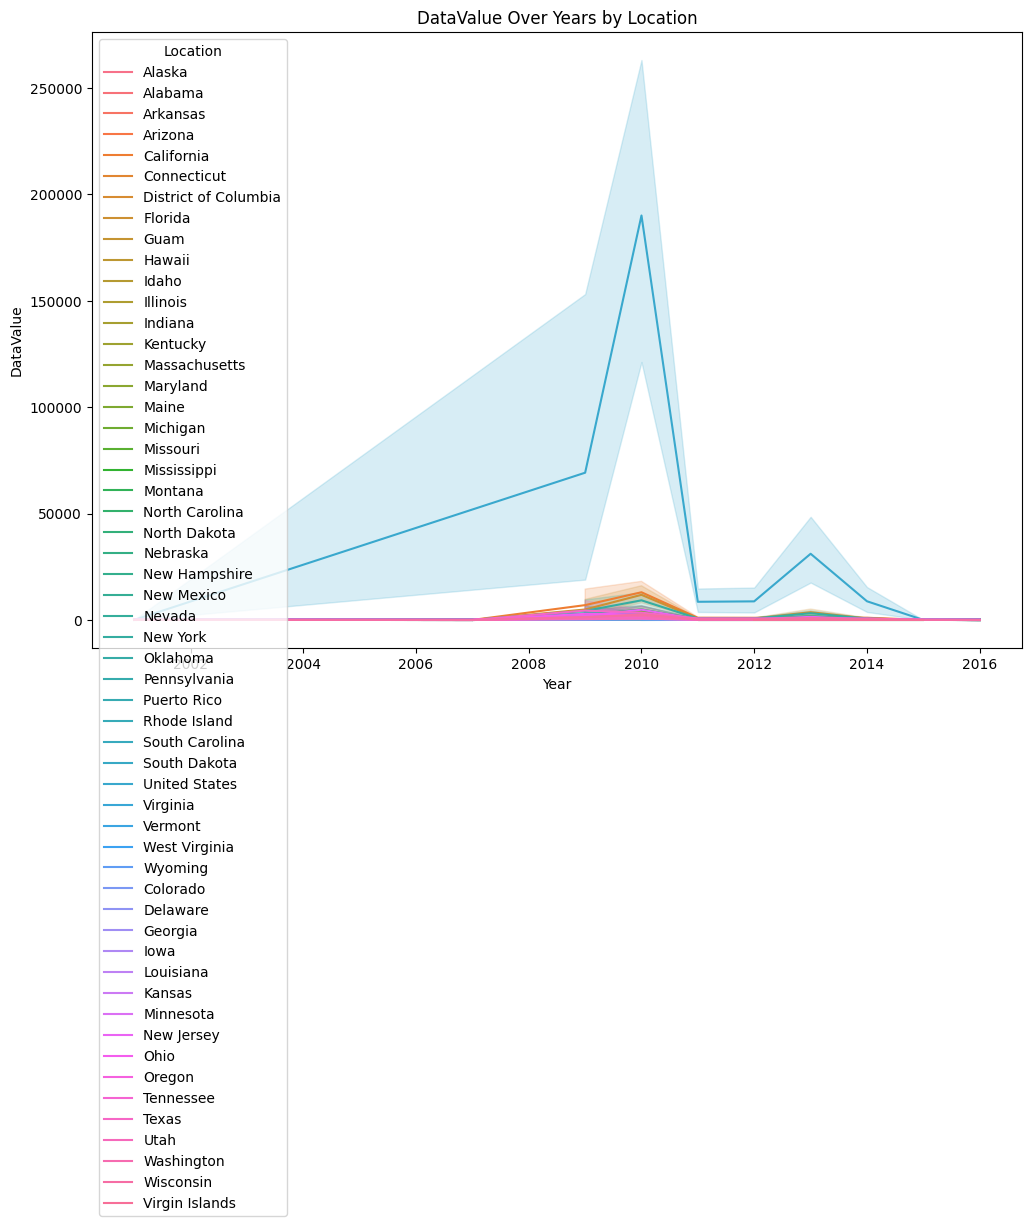

In [8]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='YearStart', y='DataValue', hue='LocationDesc', data=df_selected, markers=True, dashes=False)
plt.title('DataValue Over Years by Location')
plt.xlabel('Year')
plt.ylabel('DataValue')
plt.legend(title='Location')
plt.show()

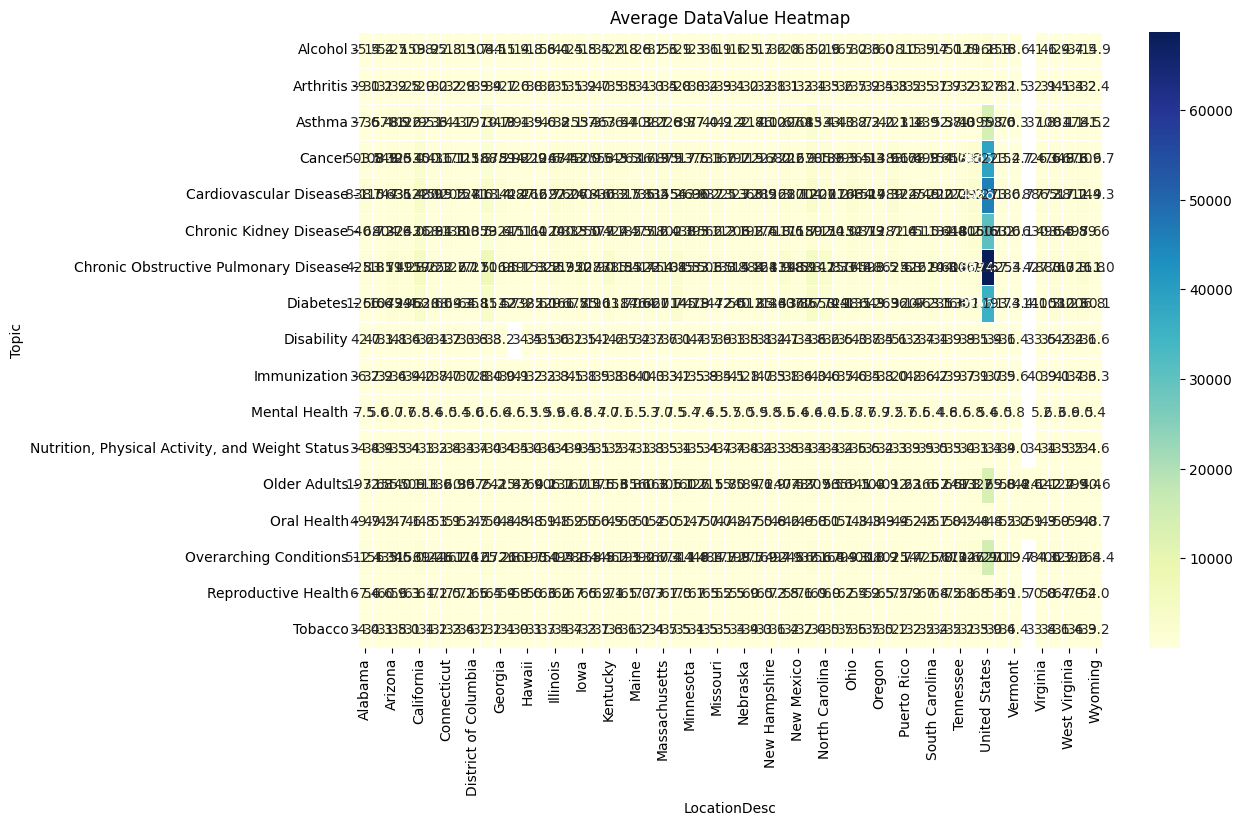

In [9]:
pivot_table = df_selected.pivot_table(values='DataValue', index='Topic', columns='LocationDesc', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average DataValue Heatmap')
plt.show()